# 深層学習と画像認識

画像データ（手書きの文字）を用いて、画像認識に挑戦してみます。
原理がわかれば、より複雑な画像認識にも挑戦していけます。


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
try:
    import japanize_matplotlib #matplotlibの日本語化  
except ModuleNotFoundError:
    !pip install japanize_matplotlib
    import japanize_matplotlib 
sns.set(font="IPAexGothic") #日本語フォント設定

## MNIST

MNIST は、「0」~「9」の手書き数字の画像データセットです。Yann LeCun らによって、手書き 文字データセットの NIST データベースから抽出&加工して、機械学習のチュートリアル用に作成されて公開されています。

ここは、画像データ(手書きの文字)を説明変数 (X)、ラベルを目的変数 (y) として学習モデルを作成してみます。

画像データ (x_train, x_test) は、サイズ 28x28, 0~255 グレースケールの形式になっています。


__MNISTデータのロード__

In [2]:
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784')


画像データは、`mnist.data`に70000万件、768(28x28)のNumPy配列で登録されています。画像データのラベルは、`mnist.target`に70000件登録されています。

In [3]:
print('画像データ', mnist.data.shape)
print('ラベル', mnist.target.shape)

画像データ (70000, 784)
ラベル (70000,)


最初の画像データをみてみましょう。
784要素の配列はみにくいので、28x28で表示してみます。
0~255 階調のグレースケールになっています。

In [9]:
print(mnist.data.values[0])

[  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   3.  18.
  18.  18. 126. 136. 175.  26. 166. 255. 247. 127.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.  30.  36.  94. 154. 170. 253.
 253. 253. 253. 253. 225. 172. 253. 242. 195.  64.   0.   0.   0.   0.
   0. 

In [15]:
print(mnist.data.values[0])

[  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   3.  18.
  18.  18. 126. 136. 175.  26. 166. 255. 247. 127.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.  30.  36.  94. 154. 170. 253.
 253. 253. 253. 253. 225. 172. 253. 242. 195.  64.   0.   0.   0.   0.
   0. 

Matplotlibで表示することもできます。

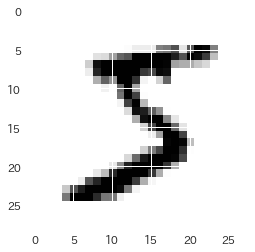

In [16]:
plt.imshow(mnist.data.values[0].reshape(28,28), cmap=plt.cm.gray_r)

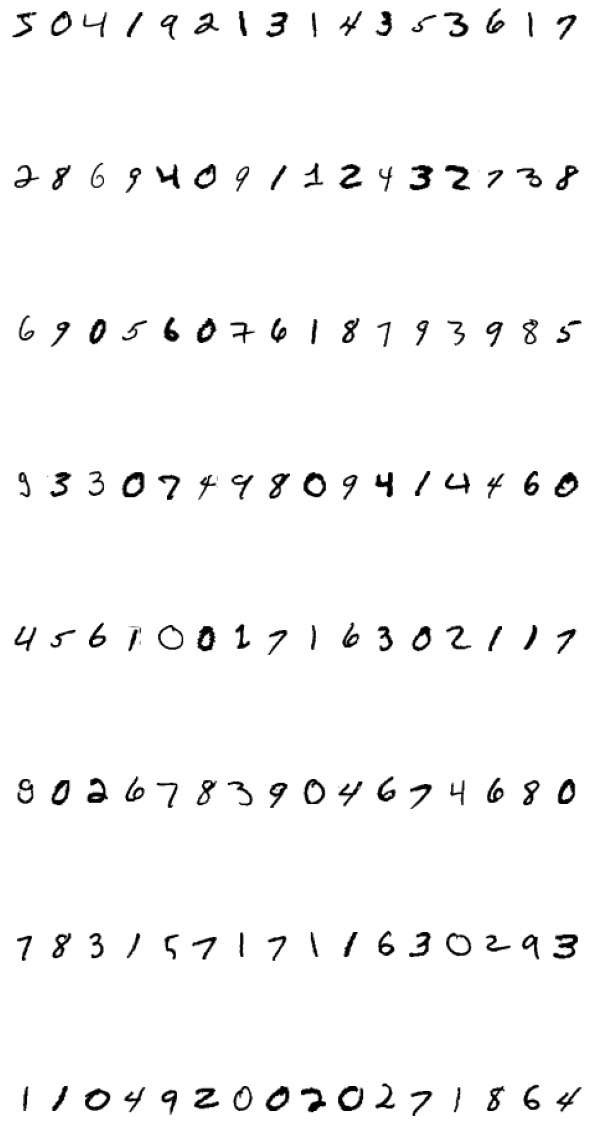

In [19]:
W = 16 # 横に並べる個数
H = 8 # 縦に並べる個数
fig = plt.figure(figsize=(H, W))
fig.subplots_adjust(left=0, right=1, bottom=0, top=1.0, hspace=1, wspace=0.05)
for i in range(W*H):
    ax = fig.add_subplot(H, W, i + 1, xticks=[], yticks=[])
    ax.imshow(mnist.data.values[i].reshape((28, 28)), cmap=plt.cm.gray_r)
plt.show()

機械学習では、28x28 Grayscale の画像データを784次元のデータとして扱います。


In [24]:
X = mnist.data.values.reshape(70000, 784) / 255  # [0,1]で正規化
y = mnist.target.values.astype(int)

# 訓練データとテストデータ
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=10000, random_state=0)

print('訓練データ数:', len(X_train))
print('テストデータ数:', len(X_test))


訓練データ数: 60000
テストデータ数: 10000


### 画像データの分布

（少しお遊びで）２次元に次元圧縮して、手書き文字がどのように分布しているかみてみましょう。

__1000枚だけ選んでPCAで次元圧縮__

In [21]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(X[:1000])  # 1000枚選ぶ
pc12 = pca.transform(X[:1000])

__表データに変換__

In [22]:
data = pd.concat([pd.DataFrame(pc12, columns=['pc1', 'pc2']), pd.DataFrame(y[:1000], columns=['label'])], axis=1)
data.head()


,pc1,pc2,label
0,0.796536,1.323753,5
1,4.334013,1.669400,0
2,0.040725,-1.636898,4
3,-3.972168,2.561406,1
4,-1.316914,-2.598636,9


<Figure size 720x720 with 0 Axes>

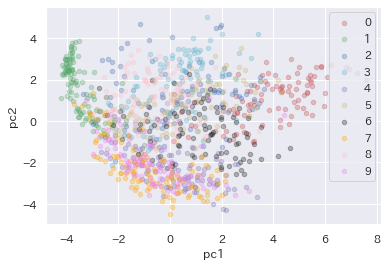

In [23]:
colors =  ["r", "g", "b", "c", "m", "y", "k", "orange", "pink", 'violet']
plt.figure(figsize=(10,10))
ax = None
for i, df in enumerate(data.head(3000).groupby('label')):
  ax = df[1].plot(kind='scatter', x='pc1', y='pc2', alpha=0.3, c=colors[int(i)], label=df[0], ax=ax)
plt.legend()
plt.show()

結構、ごちゃごちゃに重なっているところがあります。綺麗に分類できるのでしょうか？

## 多層パーセプトロン

ニューラルネットワークで紹介した多層パーセプトロン(MLPClassifier)を使ってみます。

MLPClassifier は、パーセプトロンで説明したとおり、豊富なオプションがあります。

__hidden_layer_sizes__: 中間層のサイズを設定します。

中間層が 3 つ (各中間層のニューロン数が 100 個、200 個、100 個) の 5 層ニューラル ネットワークを設定したいときは、次のように設定します。

```
hidden_layer_sizes=(100, 200, 100)
```
__activation__: 中間層の活性化関数

* identity:恒等関数
* logistic:シグモイド関数
* tanh:双曲線正接関数
* relu:ランプ関数

__solver__: 重みの最適化手法

* lbfgs:準ニュートン法に属す BFGS の一種
* sgd:確率的勾配降下法
* adam:確率的勾配降下法にモーメントをつける

__max_iter__: エポック数

今回は、３層パーセプトロンで、前回ならったとおり、活性化関数はシグモイド関数、最適化は確率的勾配降下法を用いてみます。


In [26]:
from sklearn.neural_network import MLPClassifier

model = MLPClassifier(hidden_layer_sizes=(128,), activation='logistic', solver='sgd', max_iter=20, verbose=10, random_state=0)

訓練データを学習させます。

In [27]:
history = model.fit(X_train, y_train)

Iteration 1, loss = 2.23320721
Iteration 2, loss = 2.06989000
Iteration 3, loss = 1.87448221
Iteration 4, loss = 1.65146930
Iteration 5, loss = 1.43223928
Iteration 6, loss = 1.24331458
Iteration 7, loss = 1.09217506
Iteration 8, loss = 0.97428410
Iteration 9, loss = 0.88245881
Iteration 10, loss = 0.80984222
Iteration 11, loss = 0.75156470
Iteration 12, loss = 0.70398038
Iteration 13, loss = 0.66461657
Iteration 14, loss = 0.63140618
Iteration 15, loss = 0.60303138
Iteration 16, loss = 0.57851333
Iteration 17, loss = 0.55715012
Iteration 18, loss = 0.53832779
Iteration 19, loss = 0.52163356
Iteration 20, loss = 0.50675142
/usr/local/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  warnings.warn(


`history`は学習の様子を記録したログデータです。
損失 (loss) が減少しているときは、順調に学習が進んでいます。

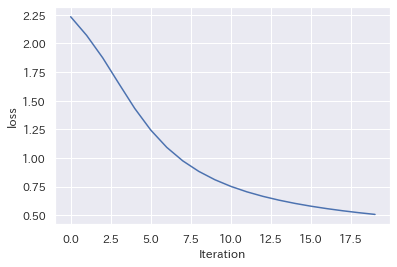

In [28]:
plt.plot(history.loss_curve_)
plt.xlabel('Iteration') 
plt.ylabel('loss') 
plt.grid(True)

In [39]:
y_pred = model.predict(X_test)

[0 4 1 2 4 4 7 1 1 7]


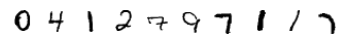

In [40]:
#fig.subplots_adjust(left=0, right=1, bottom=0, top=1.0, hspace=0.05, wspace=0.05)

def plot_mnist(X, y):
    fig = plt.figure()
    for i in range(10):
        ax = fig.add_subplot(1, 10, i + 1, xticks=[], yticks=[])
        ax.imshow(X[i].reshape((28, 28)), cmap=plt.cm.gray_r)
    print(y[:10])
    plt.show()

plot_mnist(X_test, y_pred)

### 正解率

In [41]:
print('正解率(train)', model.score(X_train, y_train))
print('正解率(test)', model.score(X_test, y_test))


正解率(train) 0.8761166666666667
正解率(test) 0.8715


正直にいって、素晴らしい正解率です。しかし、パラメータを変更すると、もっと精度があがります。

<div class="alert alert-info">

Let's try

MLPClassfierのパラメータを変更して、正解率がどう変わるか調べてみよう。

__最近のニューラルネットワークの定番パラメータ__

- 活性化関数: `relu`
- 最適化: `adam`

</div>

<div class="alert alert-info">

深層学習技術は、近年、高度化してきています。
より細かくネットワークの構成やパラメータを設定できる
Tensorflow, Kelas, Pytorch などのライブラリが登場しています。
研究レベルの予測モデルを使うときは、このようなニューラルネットワークフレームワークを活用することになります。

__Pytorchによるモデル構築の例__
```python
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(1, 10, kernel_size=5)
        self.conv2 = nn.Conv2d(10, 20, kernel_size=5)
        self.conv2_drop = nn.Dropout2d()
        self.fc1 = nn.Linear(320, 50)
        self.fc2 = nn.Linear(50, 10)

    def forward(self, x):
        x = F.relu(F.max_pool2d(self.conv1(x), 2))
        x = F.relu(F.max_pool2d(self.conv2_drop(self.conv2(x)), 2))
        x = x.view(-1, 320)
        x = F.relu(self.fc1(x))
        x = F.dropout(x, training=self.training)
        x = self.fc2(x)
        return F.log_softmax(x, dim=1)
```

興味のある人は、
PytorchやTensorflowなどニューラルネットワークを構築してみてください。
より高い正解度のモデルを構築することができます。

</div>

## 自分の手書き文字を認識する

## コースワーク（見本）

<div class="alert alert-info">

Let's try

`2 ** (1//2)` が、正しく $\sqrt{2}$ にならない理由を考えてみよう

</div>

<div class="admonition tip">

**演習（画像処理）**

...

</div>

